#Importing libaries and data sets

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[8,6.4]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


In [14]:
train.shape

(1460, 81)

#I want to redo how I went about my feature selections. The way I did it seems to be off of just what I believe versus a more analytic and strategic approach. So what I'm going to do to fix this will be:

- Find the columns that has over 55% corelation to sale price
- Lets use a heatmap for this and then have each tile show their correlation percentage
- The ones over 55% will be the columns im gonna go with
- I should probably split the numerical and categorical data into their own DF 

In [33]:
train.dtypes.value_counts()
train_int = train.select_dtypes(exclude=['object'])
train_obj = train.select_dtypes(exclude=['int64','float64'])
# train_int.dtypes.value_counts()
# train_obj.dtypes.value_counts()
# train_int.dtypes.value_counts()

#Feature Selection
Below are the columns I decided to use and why I believe they affect the pricing. 
I will analyze each of the column to see if there is any correlation between them and sale prices
Once Completed I will evaluate the ones that did result with positive regression and from there create a multilinear regression model to see how they affect each other versus when evaluated on their own
- SalePrice: This is the dependent variable we are trying to produce
- Neighborhood: the location can impact price
- MSZoning: The classification of the sale can impact price. Ex: high vs low residential density
- GrLivArea: A larger lot can lead to an increase in price
- BldgType: Different types of buildings can lead to differences in prices. A single family might cost more than a duple
- HouseStyle: The different stories can affect prices as a 2 story can take have the same sq ft as a single story without taking up as much surface area
- OVerallQual: Quality of material and finish can affect price due to upfront cost
- OVerallCond: Condition of the house can affect price due to how valuable the condition is perceived
- YearBuilt: Age of house can affect price as the age can enhanced the value
- BedroomAbvGr: Amount of bedrooms can affect pricing as more bedrooms can lead to higher prices
-FullBath: Similar to Bedroom
-HalfBath: Similar to bedroom



In [16]:
# train = train[['Neighborhood', 'MSZoning','GrLivArea','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','BedroomAbvGr','FullBath','HalfBath','SalePrice']]
# print(train.info())

#Determining Missing Values

In [17]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

##Features and dependent variable did not contain any null variables. Individual analysis of each feature can begin

#Analyzing Price

In [18]:
train['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

c:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

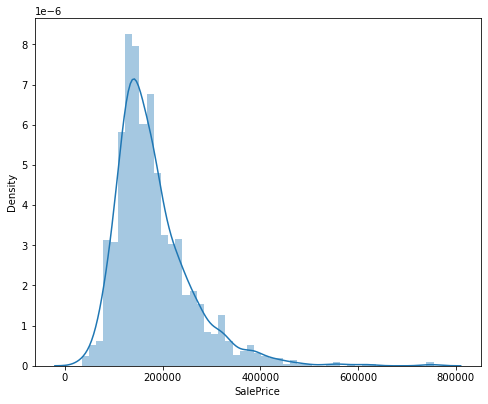

In [19]:

sns.distplot(train['SalePrice'])

Majority of sales prices seem to be around the $150,000 range

<AxesSubplot:xlabel='HalfBath', ylabel='SalePrice'>

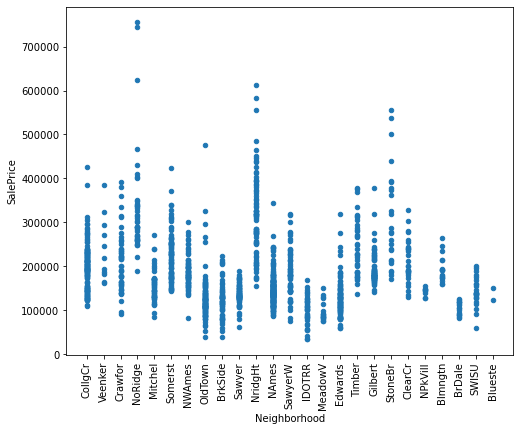

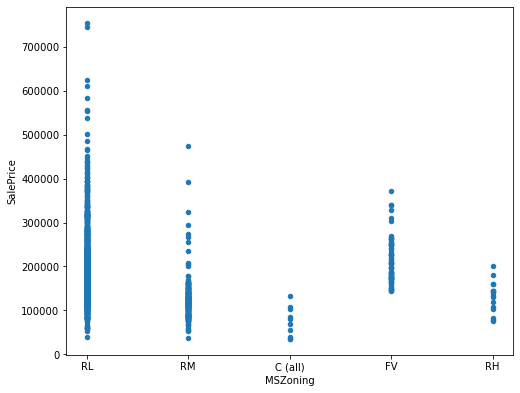

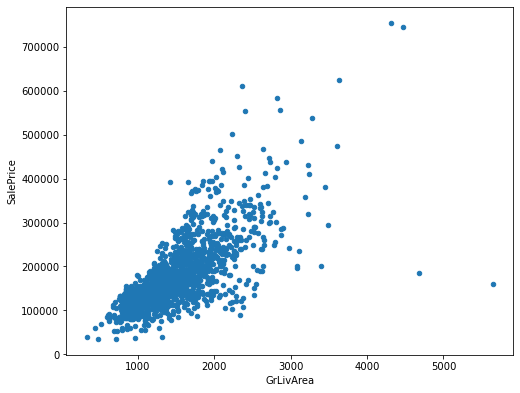

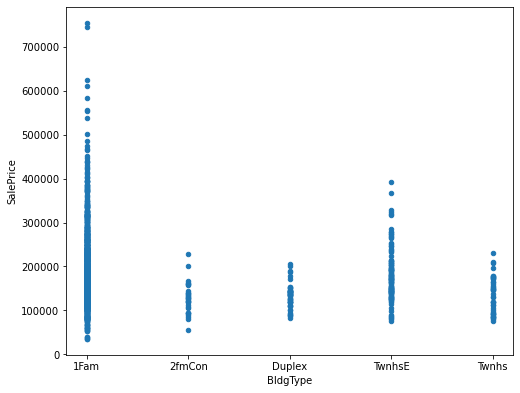

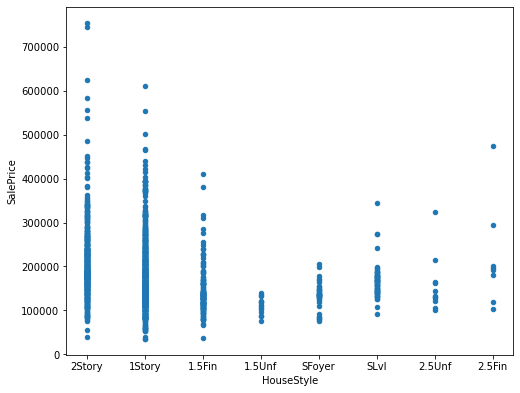

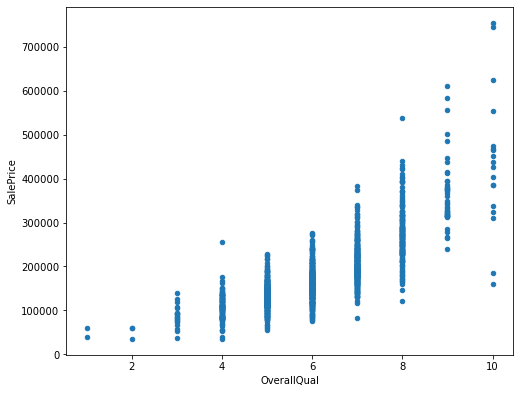

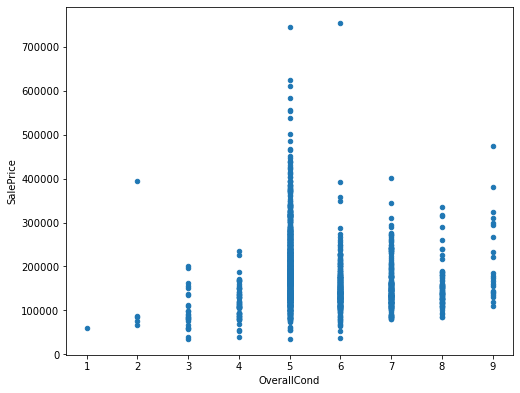

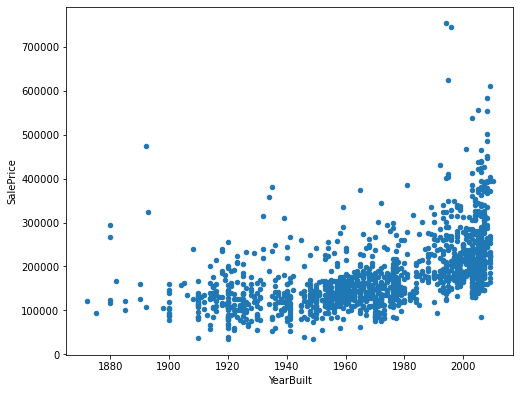

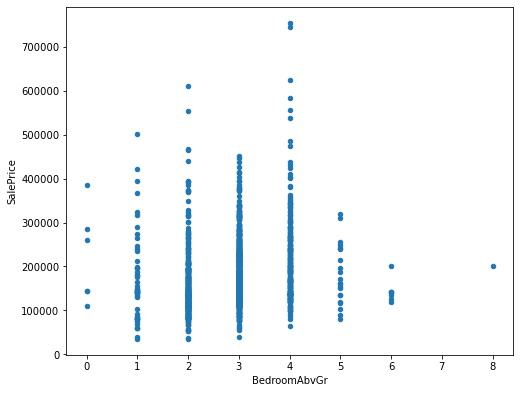

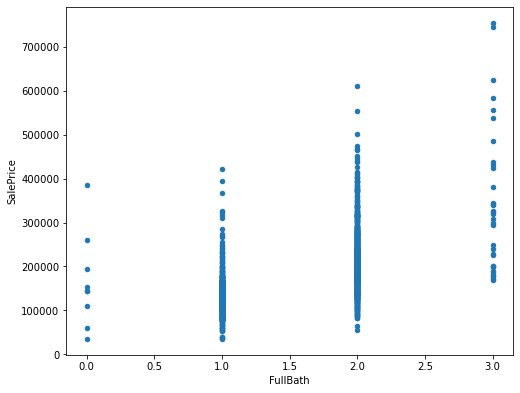

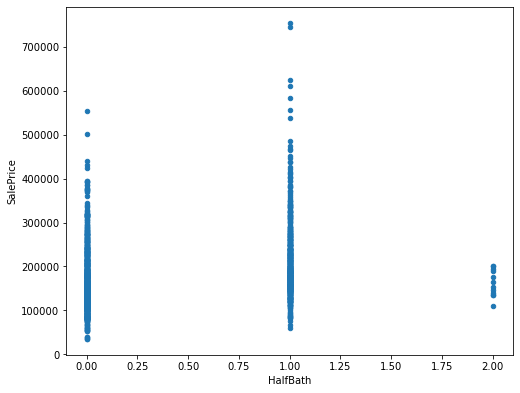

In [20]:
#Change this section to help find outliers and decide to accept or reject them since I already done my feature selection via correlation over 55%

fig = train.plot.scatter(x='Neighborhood',y='SalePrice').tick_params(axis='x',labelrotation=90)
train.plot.scatter(x='MSZoning',y='SalePrice')
train.plot.scatter(x='GrLivArea',y='SalePrice')
train.plot.scatter(x='BldgType',y='SalePrice')
train.plot.scatter(x='HouseStyle',y='SalePrice')
train.plot.scatter(x='OverallQual',y='SalePrice')
train.plot.scatter(x='OverallCond',y='SalePrice')
train.plot.scatter(x='YearBuilt',y='SalePrice')
train.plot.scatter(x='BedroomAbvGr',y='SalePrice')
train.plot.scatter(x='FullBath',y='SalePrice')
train.plot.scatter(x='HalfBath',y='SalePrice')

